# Variáveis do GeoDataFrame dos bairros de Belém

O GeoDataFrame contém informações geográficas e socioeconômicas dos bairros de Belém. Abaixo está a descrição das variáveis:

- **Bairro**: Nome do bairro de Belém.  
- **geometry**: Polígono geográfico que representa os limites do bairro (formato shapefile).  
- **Habitações**: Número total de habitações no bairro.  
- **Moradores**: Número total de moradores no bairro.  
- **Média**: Média de moradores por habitação (Moradores ÷ Habitações).  
- **N**: Número de moradores com renda registrada.  
- **avg**: Renda média dos moradores do bairro.  
- **mdn**: Mediana da renda dos moradores do bairro.  


In [1]:
import geopandas as gpd
import pandas as pd
import os
import folium
import plotly.express as px
import plotly.graph_objects as go

In [2]:
#leitura dos dados
path='/home/akel/PycharmProjects/Data_ambiental/data/process/'
filename="shape_bairros.gpkg"
path='/home/akel/PycharmProjects/Data_ambiental/data/process/'

arquivo = os.path.join(path, filename)
gdf = gpd.read_file(arquivo)
gdf.rename(columns={"NM_BAIRRO": "Bairro"}, inplace=True)

dfa = pd.read_csv(os.path.join(path,'tabela3033_final.csv'))

dfb = pd.read_csv(os.path.join(path,'tabela3170_final.csv'))
dfb_total=dfb[dfb['Grupo de idade']=='Total'].copy()  # filtrar totais


In [3]:
# Filtrar somente grupo "Total"
dfb_total = dfb[dfb['Grupo de idade'] == 'Total'].copy()
# Selecionar apenas as colunas necessárias
dfb_sel = dfb_total[['Bairro', 'N', 'avg', 'mdn']]
# Merge pela chave "Bairro"
df_full = dfa.merge(dfb_sel, on='Bairro', how='left')

# Unir geometria + atributos
gdf_merged = gdf.merge(df_full, on="Bairro", how="left")
gdf_merged.columns

Index(['Bairro', 'geometry', 'Habitações', 'Moradores', 'Média', 'N', 'avg',
       'mdn'],
      dtype='object')

/tmp/ipykernel_928713/3365177175.py:1: DeprecationWarning: *choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.choropleth_mapbox(


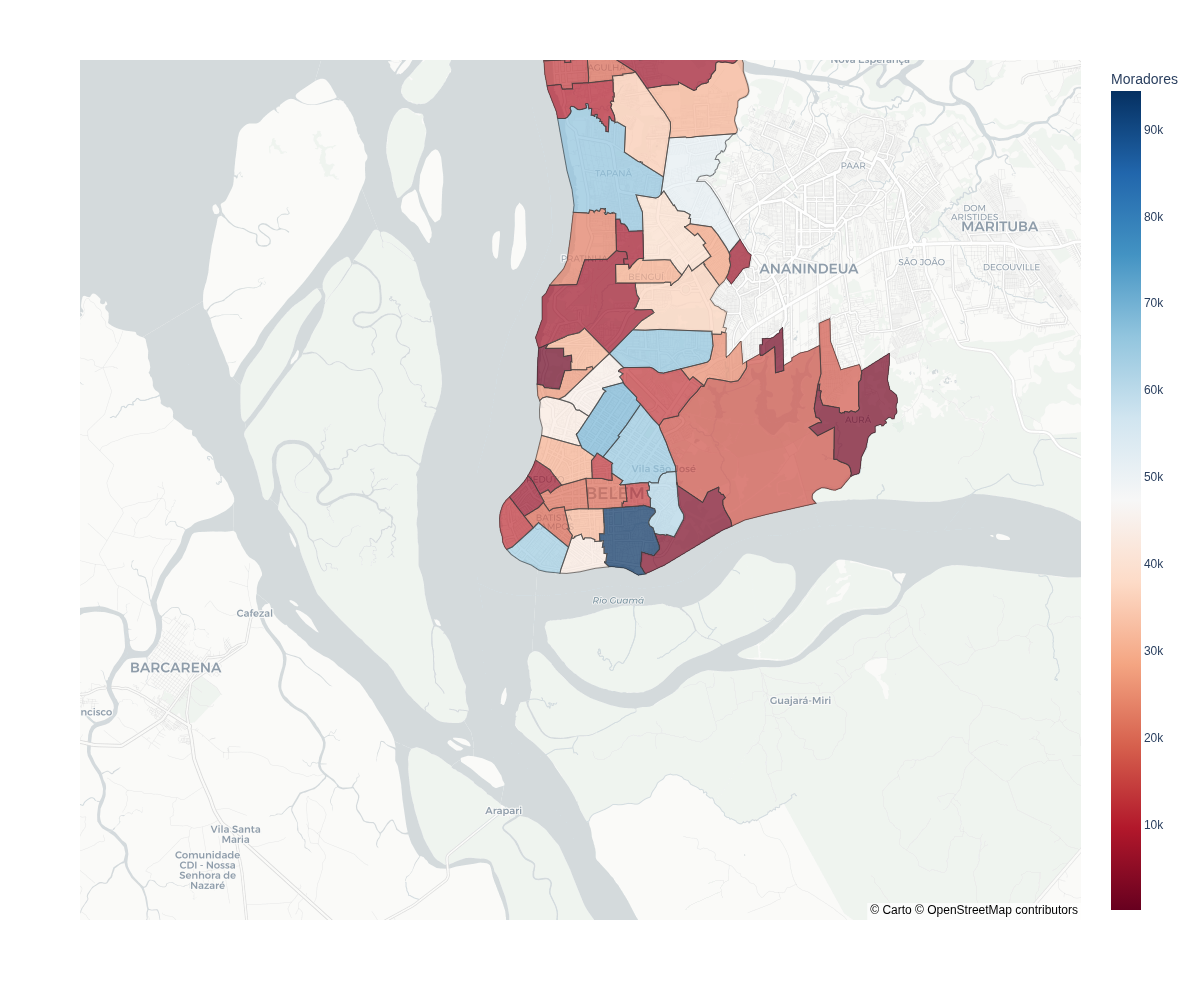

In [4]:
fig = px.choropleth_mapbox(
    gdf_merged,
    geojson=gdf_merged.geometry,
    locations=gdf_merged.index,
    color="Moradores",
    color_continuous_scale="RdBu",
    mapbox_style="carto-positron",
    zoom=11,
    center={"lat": -1.45, "lon": -48.48},
    opacity=0.7,
    hover_name="Bairro"
)

# Ajuste do tamanho da janela
fig.update_layout(
    width=1200,   # largura em pixels
    height=1000    # altura em pixels
)

# Salvar imagem
fig.write_image("/home/akel/PycharmProjects/Data_ambiental/image/mapa_plotly.png", scale=1)

fig.show('png')

/tmp/ipykernel_928713/3784611699.py:9: DeprecationWarning:

*choropleth_mapbox* is deprecated! Use *choropleth_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



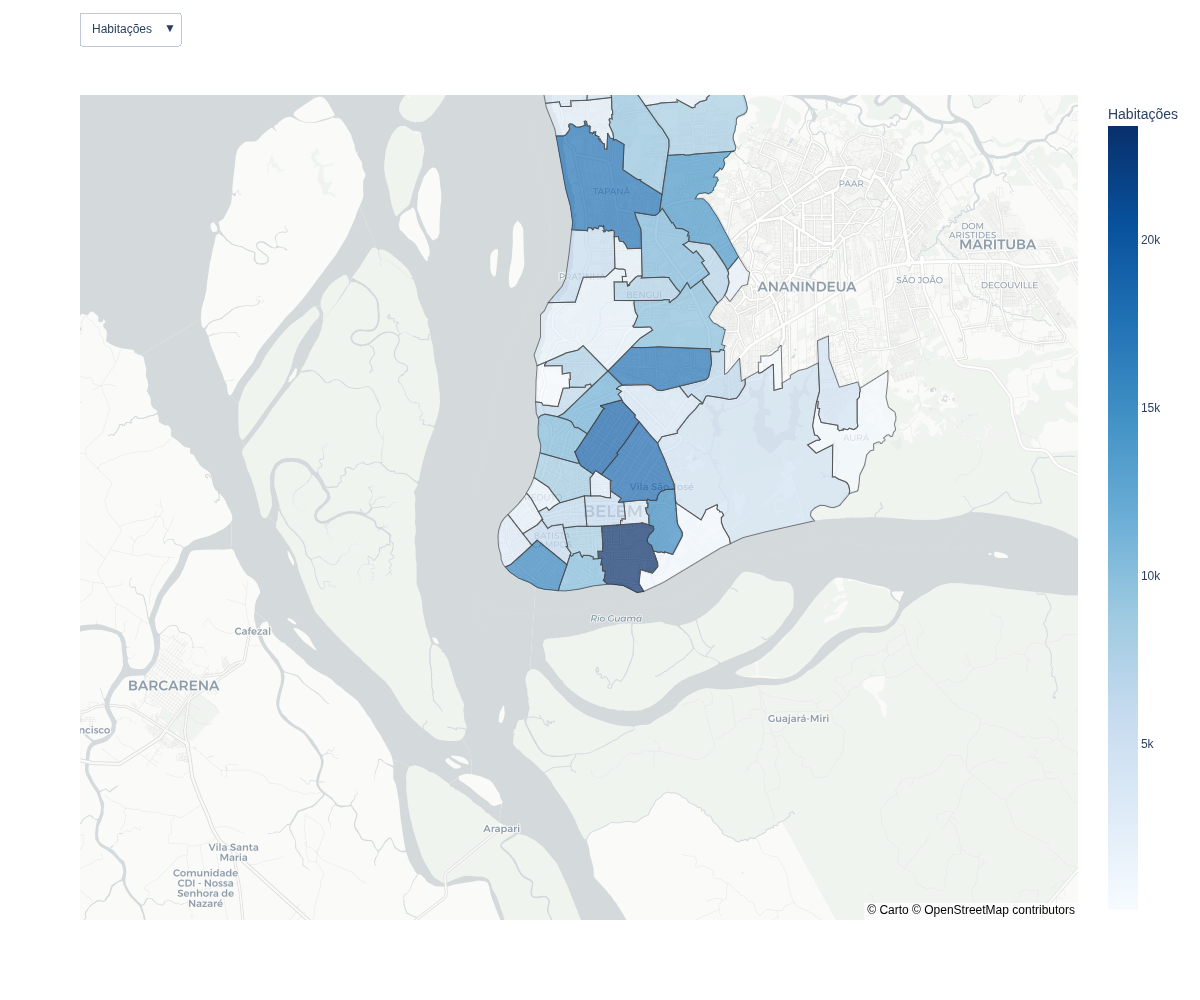

In [5]:
import plotly.express as px
import plotly.graph_objects as go

# Lista de variáveis e suas escalas
variaveis = ["Habitações", "Moradores", "Média", "N", "avg", "mdn"]
escalas = ["Blues", "Reds", "Viridis", "RdBu", "Magma", "Plasma"]  # uma escala para cada variável

# Criar o mapa inicialmente com a primeira variável
fig = px.choropleth_mapbox(
    gdf_merged,
    geojson=gdf_merged.geometry,
    locations=gdf_merged.index,
    color=variaveis[0],
    color_continuous_scale=escalas[0],
    mapbox_style="carto-positron",
    zoom=11,
    center={"lat": -1.45, "lon": -48.48},
    opacity=0.7,
    hover_name="Bairro"
)

fig.update_layout(width=1200, height=1000)

# Criar botões para dropdown
buttons = []
for var, scale in zip(variaveis, escalas):
    buttons.append(
        dict(
            method="update",
            label=var,
            args=[{"z": [gdf_merged[var]]},
                  {"coloraxis": {"colorscale": scale, "colorbar": {"title": var}}}]
        )
    )

# Adicionar dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            x=0.1,
            y=1.1,
            showactive=True
        )
    ],
    coloraxis_colorbar=dict(title=variaveis[0])
)

# Salvar imagem
fig.write_image("/home/akel/PycharmProjects/Data_ambiental/image/mapa_plotly2.png", scale=1)
fig.show('png')


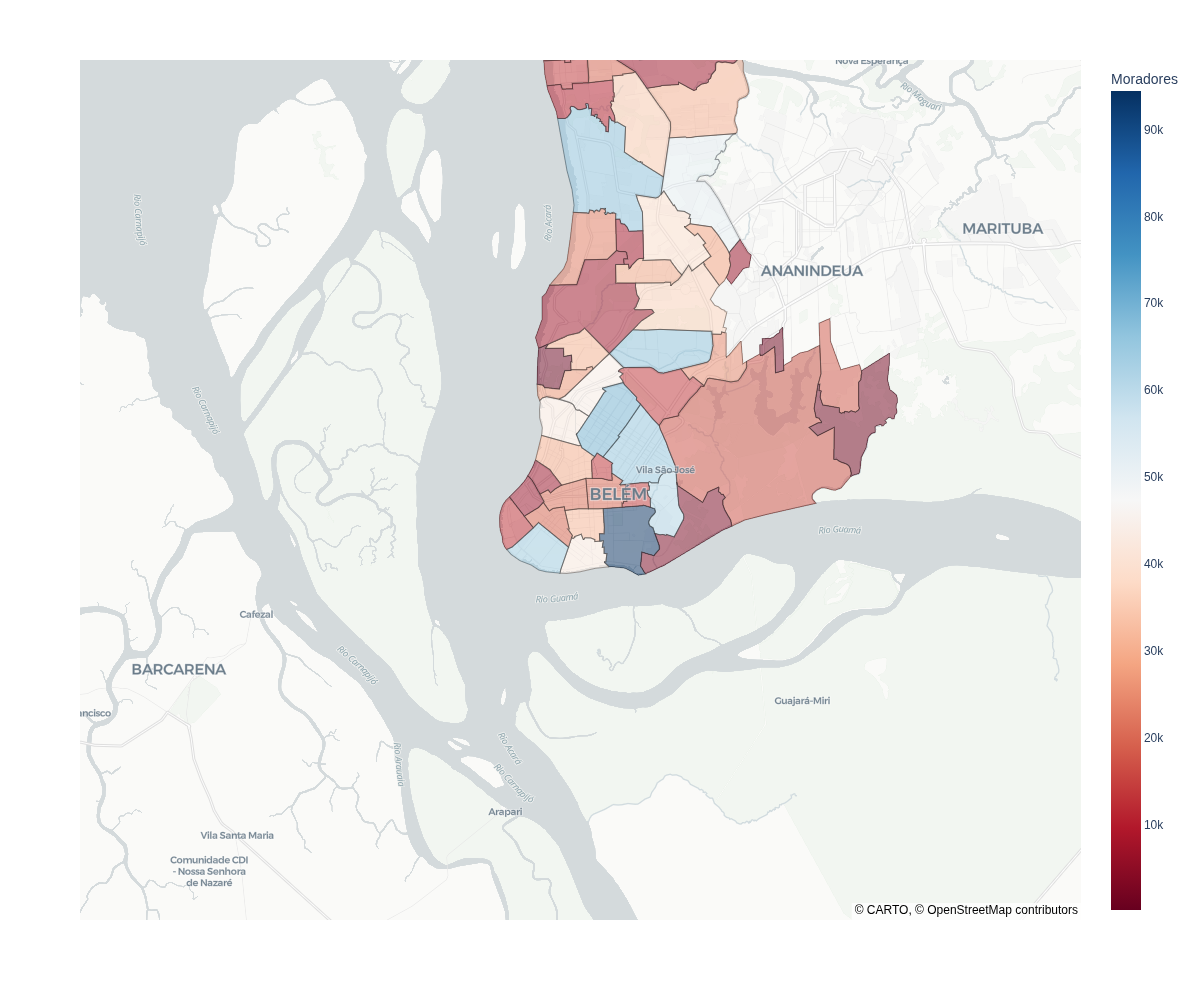

In [6]:
import plotly.express as px
import json

# Converter GeoDataFrame para geojson válido
geojson = json.loads(gdf_merged.to_json())

fig = px.choropleth_map(
    gdf_merged,
    geojson=geojson,
    locations="Bairro",
    featureidkey="properties.Bairro",  # conecta coluna do DF com GeoJSON
    color="Moradores",
    color_continuous_scale="RdBu",
    opacity=0.5,
    hover_name="Bairro"
)

# Ajuste do layout
fig.update_layout(
    width=1200,
    height=1000,
    map=dict(
        style="carto-positron",
        center={"lat": -1.45, "lon": -48.48},
        zoom=11
    )
)
fig.write_image("/home/akel/PycharmProjects/Data_ambiental/image/mapa_plotly3.png", scale=1)

fig.show('png')

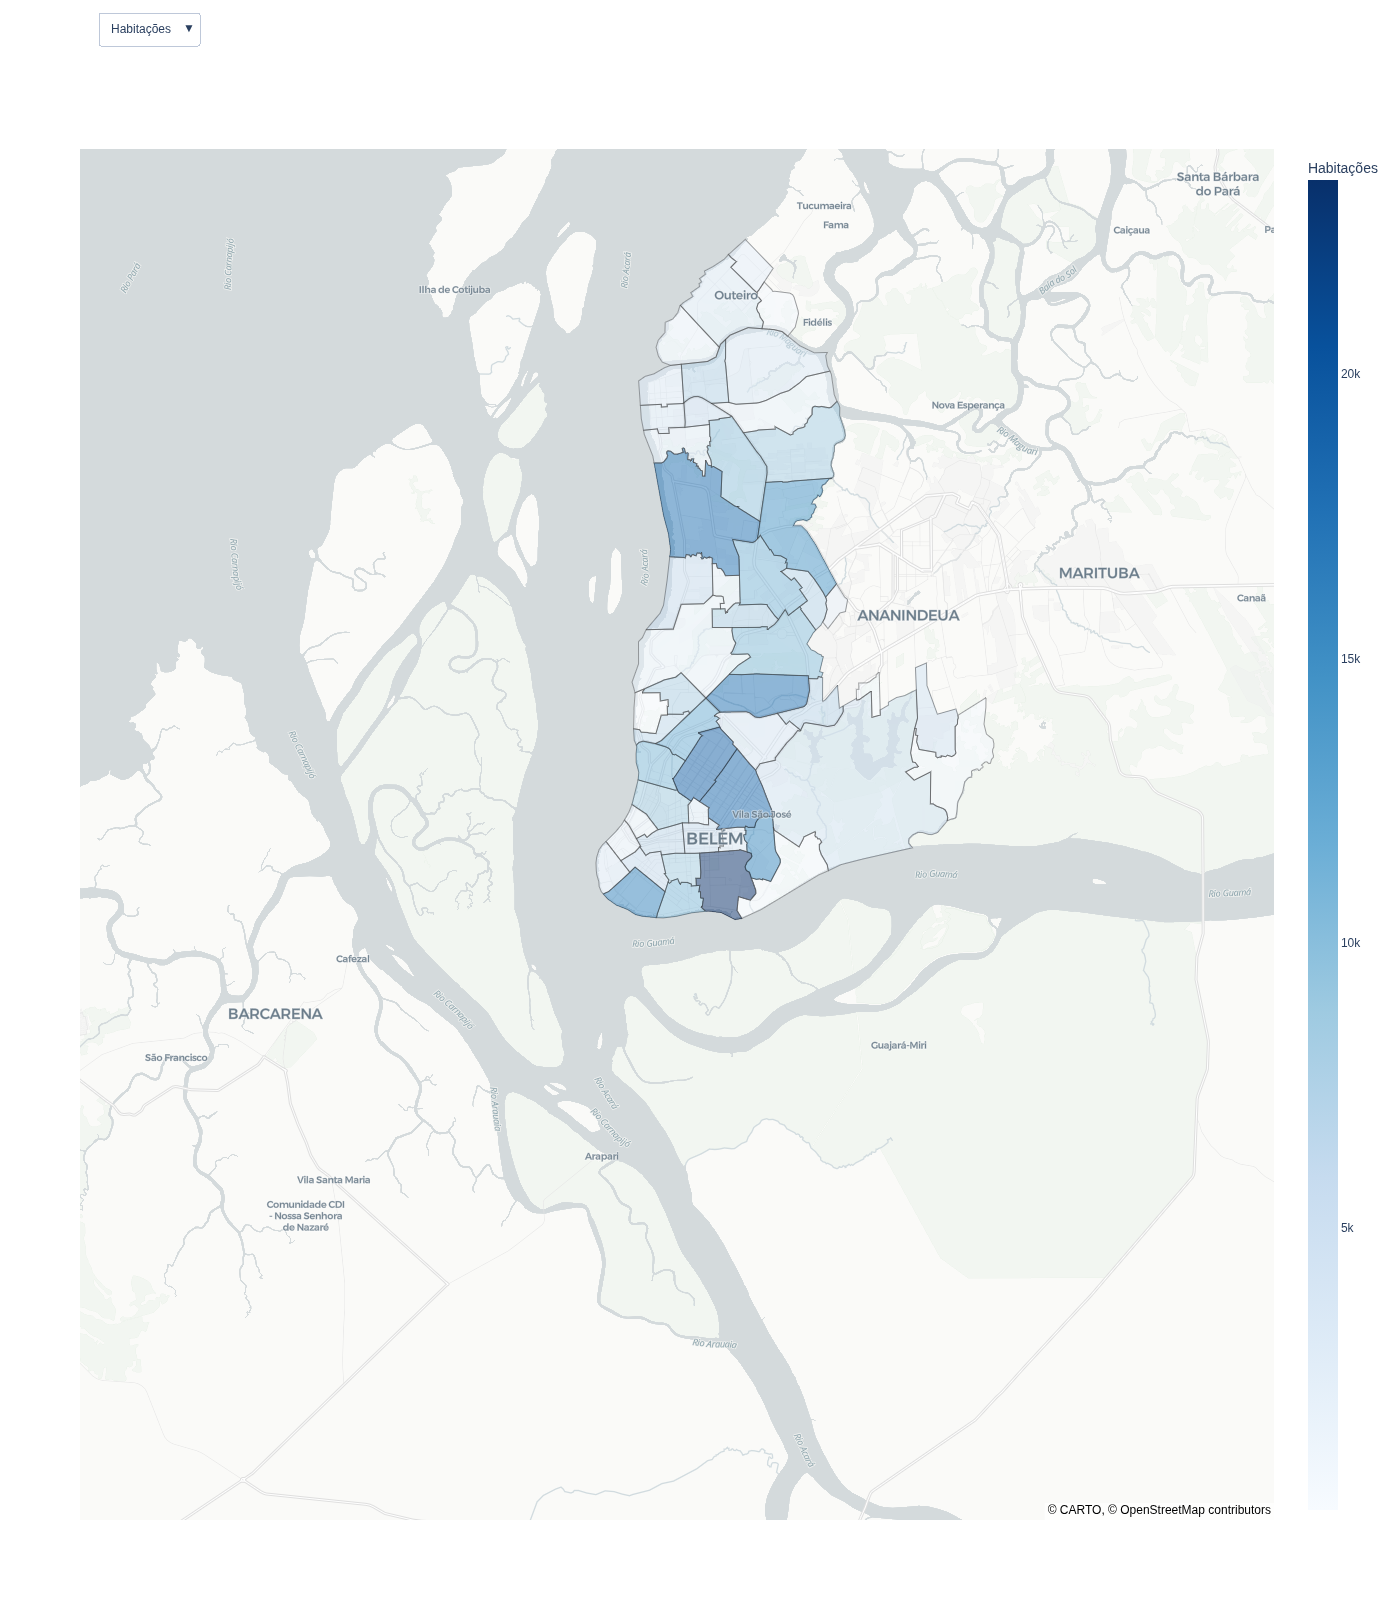

In [7]:

import json

# Converter GeoDataFrame para GeoJSON
geojson = json.loads(gdf_merged.to_json())

# Lista de variáveis e suas escalas
variaveis = ["Habitações", "Moradores", "Média", "N", "avg", "mdn"]
escalas = ["Blues", "Reds", "Viridis", "Magma", "RdBu", "Plasma"]  # escala para cada variável

# Criar mapa inicialmente com a primeira variável
fig = px.choropleth_map(
    gdf_merged,
    geojson=geojson,
    locations="Bairro",
    featureidkey="properties.Bairro",  # conecta coluna DF ao GeoJSON
    color=variaveis[0],
    color_continuous_scale=escalas[0],
     opacity=0.5,
    hover_name="Bairro"
)

# Ajuste do layout do mapa
fig.update_layout(
    width=1400,
    height=1600,
    map=dict(
        style="carto-positron",
        center={"lat": -1.45, "lon": -48.48},
        zoom=11
    )
)

# Criar botões para dropdown
buttons = []
for var, scale in zip(variaveis, escalas):
    buttons.append(
        dict(
            method="update",
            label=var,
            args=[
                {"z": [gdf_merged[var]]},
                {"coloraxis": {"colorscale": scale, "colorbar": {"title": var}}}
            ]
        )
    )

# Adicionar dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction="down",
            x=0.1,
            y=1.1,
            showactive=True
        )
    ],
    coloraxis_colorbar=dict(title=variaveis[0])
)
fig.write_image("/home/akel/PycharmProjects/Data_ambiental/image/mapa_plotly4.png", scale=1)

fig.show('png')

In [8]:
#=========================
#           folium
#========================
# Unir geometria + atributos
gdf_merged = gdf.merge(df_full, on="Bairro", how="left")

m = folium.Map(location=[-1.45, -48.48], zoom_start=12, tiles="cartodbpositron")

folium.Choropleth(
    geo_data=gdf_merged,
    name='Moradores',
    data=gdf_merged,
    columns=['Bairro', 'avg'],
    key_on='feature.properties.Bairro',
    fill_color='RdBu_r',
    fill_opacity=0.8,
    line_opacity=0.5,
    nan_fill_color='gray',
    legend_name='Renda média'
).add_to(m)

for _, r in gdf_merged.iterrows():
    popup_html = f"""
    <b>Bairro:</b> {r['Bairro']}<br>
    <b>Habitações:</b> {r['Habitações']}<br>
    <b>Moradores:</b> {r['Moradores']}<br>
    <b>Moradores por\
    habitacao:</b> {r['Média']}<br>
    
    <b>renda media:</b> {r['avg']}<br>
    <b>Renda mediana:</b> {r['mdn']}<br>
    """
    
    folium.GeoJson(
        r['geometry'],
        style_function=lambda x: {"fillOpacity": 0, "color": "black", "weight": 0.8},
        tooltip=folium.Tooltip(r['Bairro']),
        popup=folium.Popup(popup_html, max_width=250)
    ).add_to(m)
m